In [1]:
import os, shutil


original_dataset_dir = '/root/downloads/dogs-vs-cats/train'

base_dir = '/root/workspace/ml/dogs-vs-cats'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [2]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [3]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

2022-07-26 02:24:48.714550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-26 02:24:48.717356: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
from keras import optimizers


model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/usr/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [5]:
# data preprocessing

from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

# 'train_generator' and 'validation_generator' are python generator
# generate batches of RGB image (20, 150, 150, 3), and label (20,)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history = model.fit_generator(
    train_generator, steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator, validation_steps=50)
model.save('dogs-vs-cats/model/small_1.h5')

Epoch 1/30


/tmp/ipykernel_138694/4095532289.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 30s 296ms/step - loss: 0.6866 - acc: 0.5460 - val_loss: 0.7151 - val_acc: 0.5170
Epoch 2/30
100/100 [==============================] - 30s 299ms/step - loss: 0.6525 - acc: 0.6165 - val_loss: 0.6545 - val_acc: 0.5910
Epoch 3/30
100/100 [==============================] - 30s 297ms/step - loss: 0.6156 - acc: 0.6615 - val_loss: 0.6055 - val_acc: 0.6650
Epoch 4/30
100/100 [==============================] - 30s 299ms/step - loss: 0.5752 - acc: 0.6875 - val_loss: 0.6058 - val_acc: 0.6610
Epoch 5/30
100/100 [==============================] - 29s 293ms/step - loss: 0.5365 - acc: 0.7180 - val_loss: 0.5711 - val_acc: 0.7050
Epoch 6/30
100/100 [==============================] - 29s 294ms/step - loss: 0.5108 - acc: 0.7460 - val_loss: 0.5708 - val_acc: 0.7030
Epoch 7/30
100/100 [==============================] - 31s 305ms/step - loss: 0.4808 - acc: 0.7655 - val_loss: 0.6236 - val_acc: 0.6650
Epoch 8/30
100/100 [==============================] - 30s 296ms/st

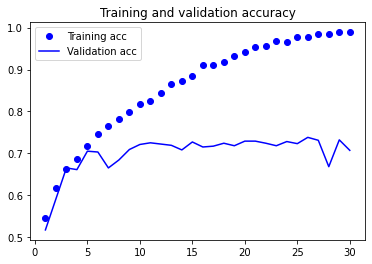

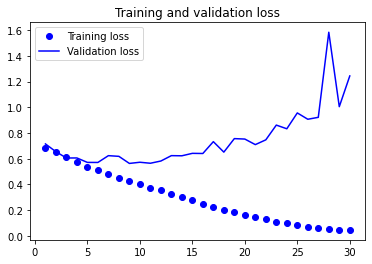

In [7]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# over fitting
# data augmentation
# specific to computer vision
# and used almost universally
# when processing images with deep learning models

In [8]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

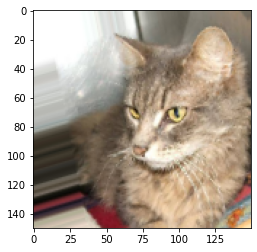

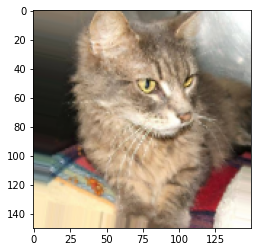

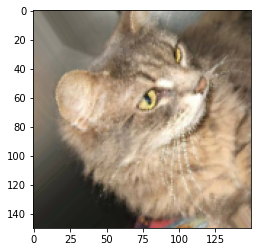

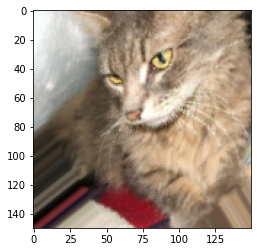

In [9]:
# displaying some randomly augmented training images

from keras import utils


fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = utils.load_img(img_path, target_size=(150, 150))
x = utils.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
# the inputs are still heavily intercorrelated,
# because they come from a small number of original images.
# this may not be enough to completely get rid of overfitting.
# to further fight overfitting,
# you'll also add a Dropout layer to your model,
# right before the densely connected classifier.

In [10]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/usr/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


def infinite_gen():
    while True:
        train_generator = train_datagen.flow_from_directory(
            train_dir, 
            target_size=(150, 150), 
            batch_size=32, 
            class_mode='binary')
        for i in train_generator:
            yield i


train_generator = infinite_gen()
validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary')


history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator, 
    validation_steps=(len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir))) / 32)
model.save('dogs-vs-cats/model/small_2.h5')

/tmp/ipykernel_138694/3432667929.py:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 46s 458ms/step - loss: 0.6931 - acc: 0.5198 - val_loss: 0.6876 - val_acc: 0.5010
Epoch 2/100
100/100 [==============================] - 46s 457ms/step - loss: 0.6760 - acc: 0.5732 - val_loss: 0.6937 - val_acc: 0.5320
Epoch 3/100
100/100 [==============================] - 47s 467ms/step - loss: 0.6688 - acc: 0.5804 - val_loss: 0.6419 - val_acc: 0.6310
Epoch 4/100
100/100 [==============================] - 43s 430ms/step - loss: 0.6616 - acc: 0.5928 - val_loss: 0.6277 - val_acc: 0.6390
Epoch 5/100
100/100 [==============================] - 46s 463ms/step - loss: 0.6425 - acc: 0.6250 - val_loss: 0.6074 - val_acc: 0.6560
Epoch 6/100
100/100 [==============================] - 43s 436ms/step - loss: 0.6287 - acc: 0.6392 - val_loss: 0.5849 - val_acc: 0.6740
Epoch 7/100
100/100 [==============================] - 45s 451ms/step - loss: 0.6150 - acc: 0.6496 -

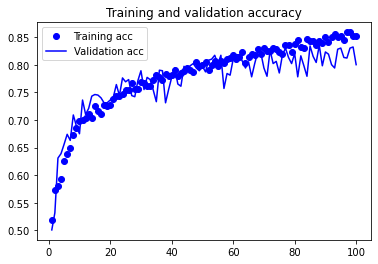

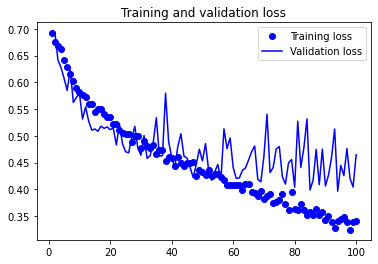

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()